# UB DataScience: Complex networks
### David Solans & Gerard Martinez

In [34]:

import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
from networkx.algorithms import community
import collections
import numpy as np
import pickle
import operator
import folium
from scipy.optimize import curve_fit

plt.style.use('seaborn')

%matplotlib inline

## Loading data

In [4]:
G_transport = nx.read_edgelist("barcelona_transport.edgelist", create_using = nx.Graph(), nodetype = int)
G_bus = nx.read_edgelist("barcelona_bus.edgelist", create_using = nx.Graph(), nodetype = int)
G_metro = nx.read_edgelist("barcelona_metro.edgelist", create_using = nx.Graph(), nodetype = int)

In [6]:
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [7]:
bus_stations_properties = load_obj("bus_stations_properties")

In [19]:
# Robustness


In [20]:
# Nodes cutting

In [21]:
# Correlations
#Degree correlations
print("Similarity of connections in the graph with respect to the node degree: ",nx.degree_pearson_correlation_coefficient(G_bus))

Similarity of connections in the graph with respect to the node degree:  0.15314097519304756


In [22]:
# Assortativity
print("Degree assortativity of the graph: ",nx.degree_assortativity_coefficient(G_bus))
#print("Assortativity for node attributes: ",nx.attribute_assortativity_coefficient(G_bus))
#print("Assortativity for numerical node attributes: ",nx.numeric_assortativity_coefficient(G_bus))
print("Degree assortativity of graph: ",nx.degree_pearson_correlation_coefficient(G_bus))

Degree assortativity of the graph:  0.15314097519304753
Degree assortativity of graph:  0.15314097519304756


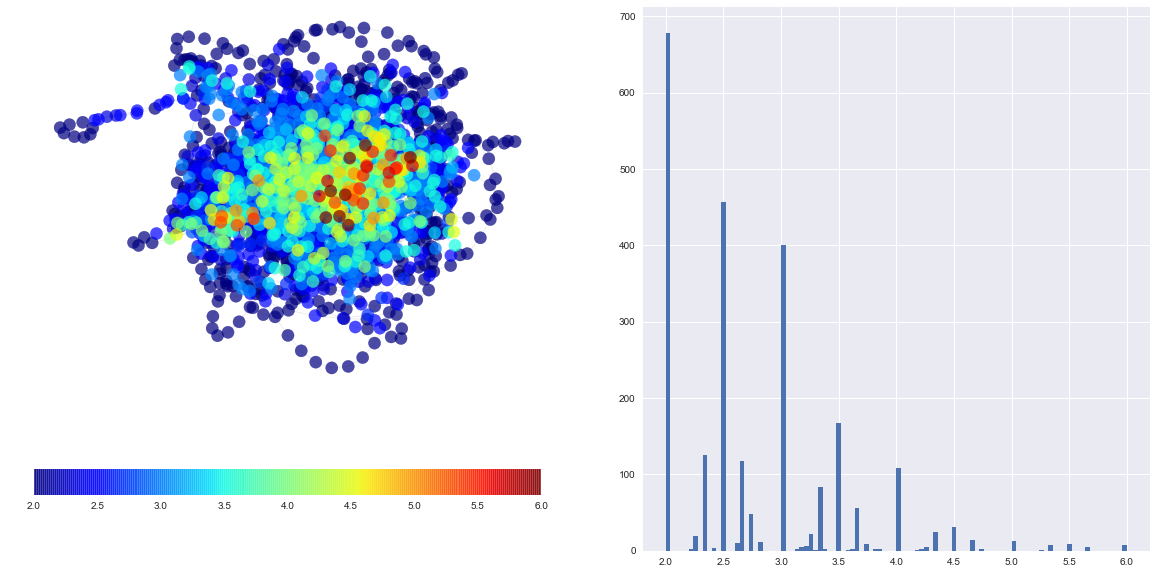

In [52]:
# Average neighbor degree
average_neighbor_degree = nx.average_neighbor_degree(G_bus)
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = average_neighbor_degree
nodelist = sorted(G_bus.nodes(), key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100)
plt.show()

### Assortativity:
Following class notes, the assortativity of the network can me analyzed by:

![Assortativity](assortativity.png)

In [57]:
nodes = G_bus.nodes()
x = []
y = []
for n in nodes:
    x.append(G_bus.degree(n))
    y.append(average_neighbor_degree[n])

a=2.271, b=-0.223


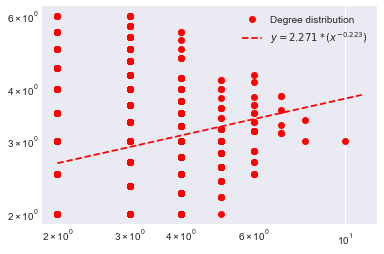

So the network seems to be assortative


In [58]:
#plt.plot(x, y, 'ro')

def func(x, a, b):
    return a *(x**(-b))

xdata = np.arange(2,11)

np.random.seed(1729)
#y_noise = 0.0002 * np.random.normal(size=xdata.size)
popt, pcov = curve_fit(func, x, y)
print('a=%5.3f, b=%5.3f' % tuple(popt))
      
      
## Log log plot        
plt.plot(x, y, 'ro', label='Degree distribution')
x_2 = list(range(2,12))
plt.plot(x_2,func(x_2, *popt), '--',color='red',label='$y=%.3f*(x^{%.3f})$'%tuple(popt))
plt.legend(loc='upper right')

plt.xscale('log')
plt.yscale('log')
plt.show()
print("So the network seems to be assortative")

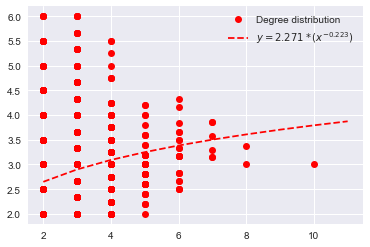

So the network has no structure?


In [59]:
#Linear 
plt.plot(x, y, 'ro', label='Degree distribution')
x_2 = list(range(2,12))
plt.plot(x_2,func(x_2, *popt), '--',color='red',label='$y=%.3f*(x^{%.3f})$'%tuple(popt))
plt.legend(loc='upper right')

plt.xscale('linear')
plt.yscale('linear')
plt.show()
print("So the network has no structure?")

In [63]:
# Random graph with same number of nodes and links
# Compare radius
# Compare clustering
n = len(G_bus.nodes())
m = len(G_bus.edges())
G_2 = nx.gnm_random_graph(n,m)

In [74]:
print("BUS:\n",nx.info(G_bus))

node_radius_bus = [] 
for g in nx.connected_component_subgraphs(G_bus): 
    node_radius_bus.append(nx.radius(g)) 
    
print("Radius: ", node_radius_bus)
print("Mean radius: ", np.mean(node_radius_bus))


BUS:
 Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330
Radius:  [20, 6, 14]
Mean radius:  13.333333333333334


In [75]:
print("Gnm random:\n",nx.info(G_2))
node_radius_2 = [] 
for g in nx.connected_component_subgraphs(G_2): 
    node_radius_2.append(nx.radius(g)) 
    
print("Radius: ", node_radius_2)
print("Mean radius: ", np.mean(node_radius_2))

Gnm random:
 Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330
Radius:  [12, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Mean radius:  0.21238938053097345
